## Equilíbrio Líquido-Vapor - Misturas não-ideais

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Como continuação do notebook equilibrio_liquido_vapor, trataremos do equilíbrio líquido-vapor com solução não ideal, usando o modelo de Margules.

A lei de Raoult modificada é:
<p> $P^{sat}_{i}$$x_{i}$$\gamma_{i}$ = P$y_{i}$</p>

Nesse caso, ainda estamos considerando o gás ideal. Logo, o coeficiente de fugacidade é 1.

Nesse notebook usarei a abordagem de orientação a objetos e o modelo que descreve a energia de Gibbs em excesso é o de Margules, para a mistura binária de acetato de metila e metanol.

O primeiro método é o de Antoine, que relaciona a pressão de saturação e a temperatura do meio.

O método de Margules, é o que permite obter o coeficiente de atividade em função da temperatura. Os modelos variam de acordo com a mistura em questão.

O método Bubble é que permite obter o ponto de bolha. O método Dew permite obter o ponto de orvalho, que requer um procedimento iterativo.

In [2]:
class ELV:
    def __init__(self,T):
        self.T = T
        
    def Antoine(self):
        self.P1_sat = np.exp(16.59158 - 3643.31/(self.T - 33.424))
        self.P2_sat = np.exp(14.25326 - 2665.54/(self.T - 53.424))
        return self.P1_sat, self.P2_sat

    def Margules(self,x1):
        x2 = 1 - x1
        self.A = 2.771 - 0.00523*self.T
        self.j1 = np.exp(self.A*x2**2)
        self.j2 = np.exp(self.A*x1**2)
        return self.j1,self.j2

    def Bubble(self,x1):
        x2 = 1 - x1
        self.P_bubble = self.Antoine()[0]*x1*self.Margules(x1)[0] + self.Antoine()[1]*self.Margules(x1)[1]*x2
        return self.P_bubble

    def Dew(self,x1):
        j1 = 1
        j2 = 1
        self.P_dew_final = []
        for j in x1:
            x2 = 1 - j
            self.P_dew = 1/(j/(j1*self.Antoine()[0]) + x2/(j2*self.Antoine()[1]))
            for i in range(0,50):
                xx1 = j*self.P_dew/(j1*self.Antoine()[0])         
                j1, j2 = self.Margules(xx1)[0],self.Margules(xx1)[1]
                self.P_dew_novo = 1/(j/(j1*self.Antoine()[0]) + x2/(j2*self.Antoine()[1]))
                erro = np.abs(self.P_dew_novo - self.P_dew)/self.P_dew
                if erro < 1e-2:
                    break
                self.P_dew = self.P_dew_novo
            self.P_dew_final.append(self.P_dew_novo)
        return self.P_dew_final

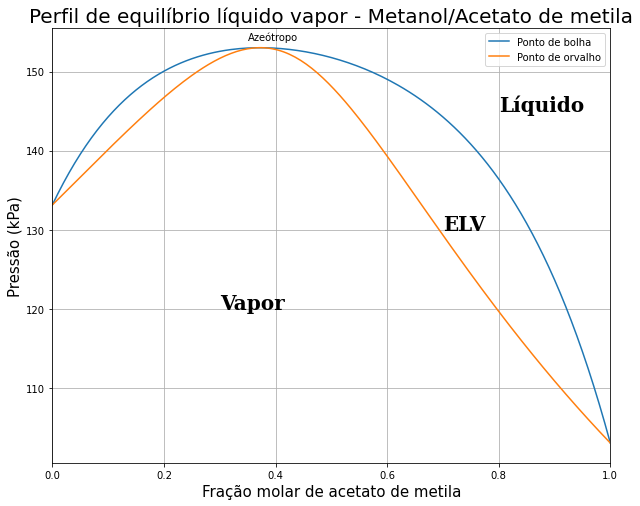

In [11]:
x = np.linspace(0,1,201)
T = 338.15
e = ELV(T)
font = {'family': 'serif',
        'weight': 'bold',
        'size': 20
        }
plt.figure(figsize=(10,8))
plt.plot(x,e.Bubble(x),x,e.Dew(x))
plt.grid(True)
plt.title("Perfil de equilíbrio líquido vapor - Metanol/Acetato de metila",font={'size':'20'})
plt.legend(["Ponto de bolha","Ponto de orvalho"])
plt.xlabel("Fração molar de acetato de metila",font={'size':'15'})
plt.ylabel("Pressão (kPa)",font={'size':'15'})
plt.xlim([0,1])
plt.text(0.8,145,'Líquido',font = font)
plt.text(0.7,130,'ELV',font = font)
plt.text(0.3,120,'Vapor',font = font)
plt.text(0.35,154,'Azeótropo') #esse ponto varia de acordo com a temperatura
plt.show()